[Portfólio][1]

[1]: <https://medium.com/turing-talks/teoria-moderna-do-portf%C3%B3lio-em-python-e8bad41ebb8b>

In [1]:
# Importando as bibliotecas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data

#### Par BTCUSDT

In [2]:
df_BTCUSDT = pd.read_csv("Binance_BTCUSDT_minute.csv", low_memory=False)
columnsBTCUSDT = list(df_BTCUSDT.index[0])
dfEBTCUSDT = pd.read_csv("Binance_BTCUSDT_minute.csv", names=columnsBTCUSDT, low_memory=False)
dfBTCUSDT = dfEBTCUSDT[['date', 'close']]
dfBTCUSDT.head()

,date,close
0,NaN,NaN
1,date,close
2,2021-04-18 00:35:00,59773.90000000
3,2021-04-18 00:34:00,59739.01000000
4,2021-04-18 00:33:00,59592.47000000


#### Par ETHUSDT

In [3]:
df_ETHUSDT = pd.read_csv("Binance_ETHUSDT_minute.csv", low_memory=False)
columnsETHUSDT = list(df_ETHUSDT.index[0])
dfETHUSDT = pd.read_csv("Binance_ETHUSDT_minute.csv", names=columnsETHUSDT, low_memory=False)
dfETHUSDT = dfETHUSDT[['date', 'close']]
dfETHUSDT.head()

,date,close
0,NaN,NaN
1,date,close
2,2021-04-18 00:35:00,2289.02000000
3,2021-04-18 00:34:00,2282.59000000
4,2021-04-18 00:33:00,2271.92000000


#### Par ADAUSDT

In [3]:
df_ETHUSDT = pd.read_csv("Binance_ADAUSDT_d.csv", low_memory=False)
columnsETHUSDT = list(df_ETHUSDT.index[0])
dfETHUSDT = pd.read_csv("Binance_ADAUSDT_d.csv", names=columnsETHUSDT, low_memory=False)
dfETHUSDT = dfETHUSDT[['date', 'close']]
dfETHUSDT.head()

,date,close
0,NaN,NaN
1,date,close
2,2021-04-18 00:35:00,2289.02000000
3,2021-04-18 00:34:00,2282.59000000
4,2021-04-18 00:33:00,2271.92000000


In [4]:
df_merge = dfBTCUSDT.merge(dfETHUSDT, how='inner', on='date',suffixes=('_BTCUSDT','_ETHUSDT'))

In [5]:
df_merge.head()

,date,close_BTCUSDT,close_ETHUSDT
0,NaN,NaN,NaN
1,date,close,close
2,2021-04-18 00:35:00,59773.90000000,2289.02000000
3,2021-04-18 00:34:00,59739.01000000,2282.59000000
4,2021-04-18 00:33:00,59592.47000000,2271.92000000


In [6]:
df_merge.index = df_merge["date"]

In [7]:
df_merge = df_merge.drop(columns = ["date"])

In [8]:
df_merge1 = df_merge[2:].dropna()
df_merge1

,close_BTCUSDT,close_ETHUSDT
date,,
2021-04-18 00:35:00,59773.90000000,2289.02000000
2021-04-18 00:34:00,59739.01000000,2282.59000000
2021-04-18 00:33:00,59592.47000000,2271.92000000
2021-04-18 00:32:00,59634.42000000,2273.41000000
2021-04-18 00:31:00,59561.11000000,2265.60000000
...,...,...
2020-09-11 20:44:00,10319.47000000,368.68000000
2020-09-11 20:43:00,10319.00000000,368.84000000
2020-09-11 20:42:00,10319.34000000,368.71000000


In [9]:
df = df_merge1

In [10]:
df["close_BTCUSDT"] = pd.to_numeric(df["close_BTCUSDT"], downcast="float")
df["close_ETHUSDT"] = pd.to_numeric(df["close_ETHUSDT"], downcast="float")

In [11]:
df

,close_BTCUSDT,close_ETHUSDT
date,,
2021-04-18 00:35:00,59773.898438,2289.020020
2021-04-18 00:34:00,59739.011719,2282.590088
2021-04-18 00:33:00,59592.468750,2271.919922
2021-04-18 00:32:00,59634.421875,2273.409912
2021-04-18 00:31:00,59561.109375,2265.600098
...,...,...
2020-09-11 20:44:00,10319.469727,368.679993
2020-09-11 20:43:00,10319.000000,368.839996
2020-09-11 20:42:00,10319.339844,368.709991


### Retorno

In [12]:
# Retorno simples dos ativos
df.pct_change().head()

,close_BTCUSDT,close_ETHUSDT
date,,
2021-04-18 00:35:00,NaN,NaN
2021-04-18 00:34:00,-0.000584,-0.002809
2021-04-18 00:33:00,-0.002453,-0.004675
2021-04-18 00:32:00,0.000704,0.000656
2021-04-18 00:31:00,-0.001229,-0.003435


#### *** Testes com mais moedas e adicionar valores ao vetor de pesos w

In [31]:
r = df.pct_change() #retornos do ativo
w = [0.3, 0.2] #pesos . Se utilizarmos mais moedas podemos atribuir mais diferentes como w = [0.3, 0.3, 0.2, 0.2]
R = np.dot(r, w) #retorno do portfólio

### Risco

In [14]:
vol = df.std()

In [15]:

# retorno simples 
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252

# matriz de covariância 
covariance = np.cov(r[1:].T)

In [16]:
w = pd.DataFrame(w)

In [17]:
# Risco do portfólio anualizado
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

### Simulando Portfólios

In [18]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [19]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [20]:
wallets = generate_wallets(df)

In [21]:
best_portfolio(wallets)

array([7.90219760e-05, 9.99920978e-01])

### A Fronteira Eficiente

In [22]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

### A Fronteira Eficiente

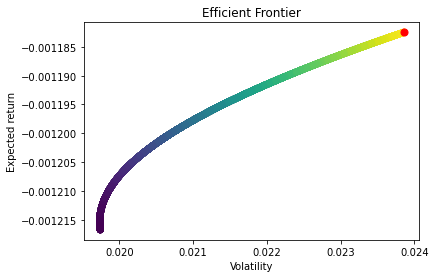

In [23]:
plot_efficient_frontier(wallets)

### O que é um bom portfólio?

In [24]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [25]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

In [26]:
wallets = generate_wallets(df)

In [27]:
best_portfolio(wallets, method = 'volatility')

array([0.95919641, 0.04080359])

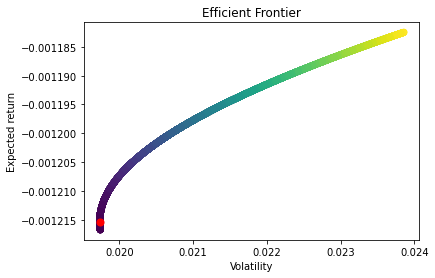

In [28]:
plot_efficient_frontier(wallets, method = 'volatility')

In [29]:
best_portfolio(wallets, method = 'return')

array([7.93360862e-08, 9.99999921e-01])

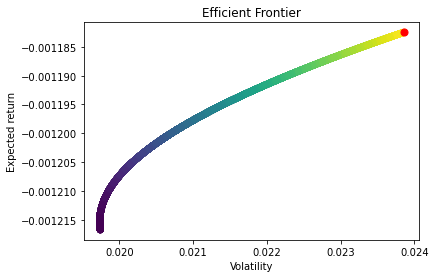

In [30]:
plot_efficient_frontier(wallets, method = 'return')